In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# functions

In [2]:
def rmv_first_last_cycle(df):
# remove the first and last cycle from input Dataframe

    df.drop(df.loc[df['loop_count']==-1].index, inplace=True)
    df.drop(df.loc[df['loop_count']==df['loop_count'].iloc[-1]].index, inplace=True)

In [3]:
def get_cycle_time(df, cycle_number=None):
# returns either cycle time for specified cycle or list of cycle times

    if not cycle_number == None:
        return (int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle_number]['timestamp'].iloc[0]))/1000000
    else:
        l_of_ct = []
        for cycle in df['loop_count'].unique():
            l_of_ct.append(get_cycle_time(df, cycle))
        return l_of_ct

In [4]:
def get_joint_position(df, cycle_number, position=None):
# returns intital or final joint positions as list or a list of joint positions (also as list)

    if position == 'initial':
        return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[0].to_list()
    elif position == 'final':
        return df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[-1].to_list()
    else:
        l_of_positions = []
        for row in df['loop_count'].unique():
            l_of_positions.append(df.loc[(df['loop_count']==cycle_number, df.columns[3:])].iloc[row].to_list())
        return l_of_positions

In [5]:
def min_velo_mean_std(df):
# returns tuple of mean and std of input Dataframe

    l_of_mean = []
    l_of_std = []
    for cycle in df['loop_count'].unique():
        mean = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().sum(axis=1).mean()
        std = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().sum(axis=1).std()
        l_of_mean.append((mean, cycle))
        l_of_std.append((std, cycle))
    return (l_of_mean, l_of_std)

In [6]:
def min_time_cycle(df):
# returns list of times for each cycle in input Dataframe

    l_of_ct = []
    for cycle in df['loop_count'].unique():
        cycle_time = (int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[-1])-int(df.loc[df['loop_count']==cycle]['timestamp'].iloc[0]))/1000000
        l_of_ct.append((cycle_time, cycle))
    return l_of_ct

In [7]:
def min_joint_movement(df):
# returns list of integrals. The integral is calculated from the accumulated sum of absolute joint movements during each cycle of input Dataframe

    l_of_integrals = []
    for cycle in df['loop_count'].unique():
        cycle_joints = df.loc[(df['loop_count']==cycle, df.columns[3:])].abs().cumsum(axis=0)
        cycle_cumulated = cycle_joints.cumsum(axis=1)['a7'] # the accumulated result is written in the last column
        integral = cycle_cumulated.sum()/len(cycle_cumulated)
        l_of_integrals.append((integral, cycle))
    return l_of_integrals

In [8]:
def filter_high_cycle_times(df, threshold=2000):
# removes those cycles from input Dataframe, that have a cycle time above a given threshold

    for cycle_time in [jp for jp in get_cycle_time(df) if jp > threshold][::-1]:
        initial_cycle = df['loop_count'].iloc[0]
        df.drop(df[df['loop_count']==get_cycle_time(df).index(cycle_time)+initial_cycle].index, inplace=True)

In [9]:
def plot_all():
# plots all the plots

    fig, axs = plt.subplots(4,4, tight_layout=True)

    axs[0,0].plot(get_cycle_time(jp_speed_short))
    axs[0,0].set_title('jp_speed_short')

    axs[0,1].plot(get_cycle_time(jp_distance_short))
    axs[0,1].set_title('jp_distance_short')

    axs[0,2].plot(get_cycle_time(jp_manip1_short))
    axs[0,2].set_title('jp_manip1_short')
    axs[1,2].plot(get_cycle_time(jp_manip1_long))
    axs[1,2].set_title('jp_manip1_long')
    axs[2,2].plot(get_cycle_time(jp_manip1_long_5))
    axs[2,2].set_title('jp_manip1_long_5')
    axs[3,2].plot(get_cycle_time(jp_manip1_long_10))
    axs[3,2].set_title('jp_manip1_long_10')

    axs[0,3].plot(get_cycle_time(jp_manip2_short))
    axs[0,3].set_title('jp_manip2_short')
    axs[1,3].plot(get_cycle_time(jp_manip2_long))
    axs[1,3].set_title('jp_manip2_long')

# import data

In [10]:
jp_speed_short = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_094832')
jp_distance_short = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_090327')
jp_manip1_short = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_080501')
jp_manip1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_105247')
jv_manip1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_105247')
jp_manip1_long_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230125_075156')
jv_manip1_long_5 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230125_075156')
jp_manip1_long_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230124_103805')
jv_manip1_long_10 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230124_103805')
jp_manip2_short = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')
jp_manip2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_152415')
jv_manip2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_152415')

joint_positions = [jp_speed_short, jp_distance_short, jp_manip1_short, jp_manip1_long, jp_manip1_long_5, jp_manip1_long_10, jp_manip2_short, jp_manip2_long]
joint_positions_names = ['jp_speed_short','jp_distance_short','jp_manip1_short','jp_manip1_long','jp_manip1_long_5','jp_manip1_long_10','jp_manip2_short','jp_manip2_long']
joint_velocities = [jv_manip1_long, jv_manip1_long_5, jv_manip1_long_10, jv_manip2_long]
joint_velocities_names = ['jv_manip1_long','jv_manip1_long_5','jv_manip1_long_10','jv_manip2_long']

special static route

In [11]:
static_joint_positions = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230203_160634')

In [48]:
static_joint_positions

,seq,timestamp,loop_count,a1,a2,a3,a4,a5,a6,a7
349,349,20230203160637248621,2,1.575901,0.985521,1.838896,1.320408,-1.909975,0.172631,-0.181060
350,350,20230203160637252374,2,1.575305,0.984996,1.839683,1.319756,-1.909474,0.172484,-0.181888
351,351,20230203160637256115,2,1.574944,0.984682,1.840159,1.319370,-1.909171,0.172394,-0.182405
352,352,20230203160637259603,2,1.574462,0.984261,1.840788,1.318856,-1.908773,0.172280,-0.183081
353,353,20230203160637263806,2,1.573979,0.983840,1.841419,1.318342,-1.908382,0.172152,-0.183734
...,...,...,...,...,...,...,...,...,...,...
27647,27647,20230203161026904756,6,1.579645,0.987203,1.835736,1.324003,-1.916436,0.170697,-0.174011
27648,27648,20230203161026910088,6,1.579165,0.986791,1.836358,1.323462,-1.916001,0.170625,-0.174716
27649,27649,20230203161026913638,6,1.578687,0.986374,1.836974,1.322915,-1.915574,0.170548,-0.175402
27650,27650,20230203161026918390,6,1.578206,0.985956,1.837590,1.322364,-1.915153,0.170459,-0.176093


In [13]:
rmv_first_last_cycle(static_joint_positions)

export joint positions of best cycle

In [14]:
l_of_static_jps_2 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==2, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_2.append(static_joint_positions.loc[(static_joint_positions['loop_count']==2, static_joint_positions.columns[3:])].iloc[row].to_list())

In [15]:
l_of_static_jps_3 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==3, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_3.append(static_joint_positions.loc[(static_joint_positions['loop_count']==3, static_joint_positions.columns[3:])].iloc[row].to_list())

In [16]:
l_of_static_jps_4 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==4, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_4.append(static_joint_positions.loc[(static_joint_positions['loop_count']==4, static_joint_positions.columns[3:])].iloc[row].to_list())

In [17]:
l_of_static_jps_5 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==5, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_5.append(static_joint_positions.loc[(static_joint_positions['loop_count']==5, static_joint_positions.columns[3:])].iloc[row].to_list())

In [18]:
l_of_static_jps_6 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_6.append(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].iloc[row].to_list())

In [19]:
l_of_static_jps_6 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_6.append(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].iloc[row].to_list())

In [20]:
l_of_static_jps_11 = []
for row in range(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].shape[0]):
    l_of_static_jps_11.append(static_joint_positions.loc[(static_joint_positions['loop_count']==6, static_joint_positions.columns[3:])].iloc[row].to_list())

In [21]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_2.json', 'w') as file:
    json.dump(l_of_static_jps_2, file, indent=4)
    file.close()

In [22]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_3.json', 'w') as file:
    json.dump(l_of_static_jps_3, file, indent=4)
    file.close()

In [23]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_4.json', 'w') as file:
    json.dump(l_of_static_jps_4, file, indent=4)
    file.close()

In [24]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_5.json', 'w') as file:
    json.dump(l_of_static_jps_5, file, indent=4)
    file.close()

In [25]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_6.json', 'w') as file:
    json.dump(l_of_static_jps_6, file, indent=4)
    file.close()

In [26]:
with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_6.json', 'w') as file:
    json.dump(l_of_static_jps_6, file, indent=4)
    file.close()


cycle 11 was from the file before the final one

In [27]:

with open('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_publish/src/static_jp_11.json', 'w') as file:
    json.dump(l_of_static_jps_11, file, indent=4)
    file.close()

In [28]:
static_joint_positions.loc[(static_joint_positions['loop_count']==11, static_joint_positions.columns[3:])]

,a1,a2,a3,a4,a5,a6,a7


Clean Data:
* remove possibly incomplete first and last cycle
* remove those cycles that have an unnecessary high cycle time

In [29]:
for item in joint_positions:
    rmv_first_last_cycle(item)

In [30]:
for item in joint_positions:
    filter_high_cycle_times(item)

# plotting

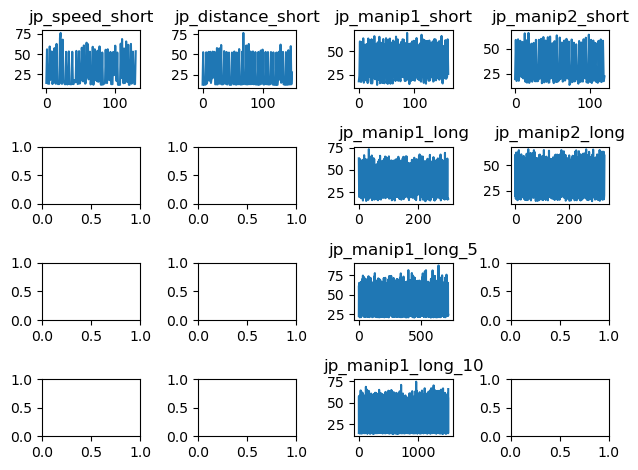

In [31]:
plot_all()

# Evaluation of Cycle Time

In [32]:
min_ct = [np.array(get_cycle_time(ct)).min() for ct in joint_positions]
max_ct = [np.array(get_cycle_time(ct)).max() for ct in joint_positions]
mean_ct = [np.array(get_cycle_time(ct)).mean() for ct in joint_positions]
yerr = [np.array(get_cycle_time(ct)).std() for ct in joint_positions]

In [33]:
min_ct

[12.002996,
 12.188178,
 14.175093,
 14.818673,
 20.875483,
 13.904265,
 13.714886,
 14.615573]

In [34]:
max_ct

[76.316164,
 76.425282,
 69.517765,
 73.176563,
 87.719016,
 74.615082,
 66.139545,
 65.897383]

In [35]:
mean_ct

[28.03549021212121,
 24.6936982,
 34.27381336419753,
 34.459879993421055,
 42.17005312898751,
 28.438328296937414,
 31.514470371900828,
 31.732029282282284]

In [36]:
yerr

[19.623572452062362,
 17.83254286708951,
 19.54848707315736,
 19.33481346364649,
 20.639292529753018,
 18.441700438171196,
 18.955372396456198,
 18.968395420244985]

/tmp/ipykernel_77483/2159172824.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(joint_positions_names, rotation=90)


[Text(0, 0, 'jp_speed_short'),
 Text(1, 0, 'jp_distance_short'),
 Text(2, 0, 'jp_manip1_short'),
 Text(3, 0, 'jp_manip1_long'),
 Text(4, 0, 'jp_manip1_long_5'),
 Text(5, 0, 'jp_manip1_long_10'),
 Text(6, 0, 'jp_manip2_short'),
 Text(7, 0, 'jp_manip2_long')]

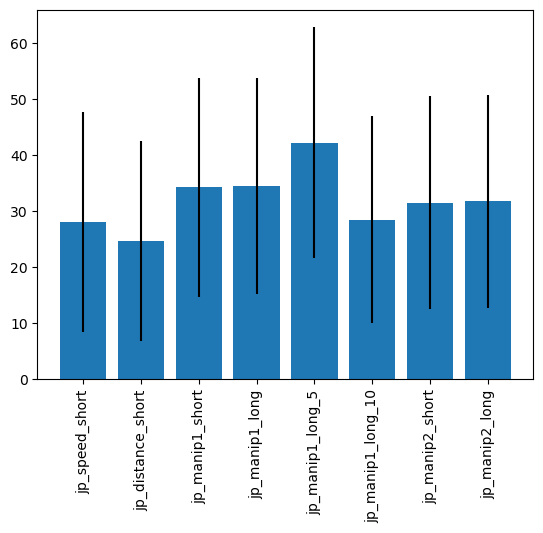

In [37]:
fig, ax = plt.subplots()

ax.bar(joint_positions_names, mean_ct, yerr=yerr)
ax.set_xticklabels(joint_positions_names, rotation=90)


# Evaluation Joint Movement

In [38]:
l_of_min_jp = [min_joint_movement(item) for item in joint_positions]

In [39]:
l_of_min_jps = []
for solver in l_of_min_jp:
    l_of_min_jps.append(np.array([item[0] for item in solver]))

In [40]:
l_of_min_ct_from_min_jp = []
for solver, cycle in zip(joint_positions, [[item[1] for item in l_of_min_jp[item2] if item[0]==[item.min() for item in l_of_min_jps][item2]] for item2 in range(8)]):
    l_of_min_ct_from_min_jp.append(get_cycle_time(solver, cycle[0]))

In [41]:
[item.min() for item in l_of_min_jps]

[2473.9299842275373,
 2369.766609059952,
 2769.9176242645954,
 2836.3424816007123,
 3556.9188033974647,
 2210.28434505915,
 2652.9427945957664,
 2680.6375560595166]

In [42]:
l_of_min_ct_from_min_jp

[12.265143,
 12.385052,
 16.080581,
 55.196331,
 20.875483,
 14.533848,
 15.772477,
 14.615573]

In [43]:
l_of_max_ct_from_min_jp = []
for solver, cycle in zip(joint_positions, [[item[1] for item in l_of_min_jp[item2] if item[0]==[item.max() for item in l_of_min_jps][item2]] for item2 in range(8)]):
    l_of_max_ct_from_min_jp.append(get_cycle_time(solver, cycle[0]))

In [44]:
[item.max() for item in l_of_min_jps]

[13203.168450790274,
 13473.067210991669,
 6874.423430299471,
 6854.601681809622,
 11275.537135714081,
 9694.668304382138,
 5671.217828905054,
 6459.192084068373]

In [45]:
l_of_max_ct_from_min_jp

[76.316164,
 76.425282,
 31.659476,
 67.266734,
 87.719016,
 74.615082,
 27.277534,
 32.575885]

In [52]:
jp_min_mean = [item.mean() for item in l_of_min_jps]

In [53]:
jp_min_yerr = [item.std() for item in l_of_min_jps]

/tmp/ipykernel_77483/3982460566.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(joint_positions_names, rotation=90)


[Text(0, 0, 'jp_speed_short'),
 Text(1, 0, 'jp_distance_short'),
 Text(2, 0, 'jp_manip1_short'),
 Text(3, 0, 'jp_manip1_long'),
 Text(4, 0, 'jp_manip1_long_5'),
 Text(5, 0, 'jp_manip1_long_10'),
 Text(6, 0, 'jp_manip2_short'),
 Text(7, 0, 'jp_manip2_long')]

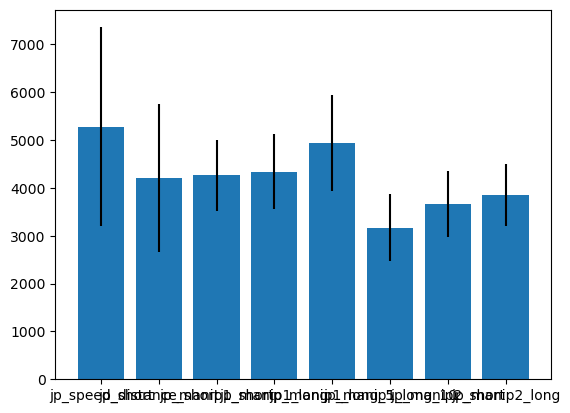

In [54]:
fig, axs = plt.subplots()
axs.bar(joint_positions_names, jp_min_mean, yerr= jp_min_yerr)
ax.set_xticklabels(joint_positions_names, rotation=90)

In [58]:
best_metric = np.array(mean_ct)*np.array(jp_min_mean)

In [60]:
best_metric

array([148135.75038925, 104050.30770653, 146205.67026775, 149511.79222204,
       208593.63994193,  90140.17690848, 115312.22073383, 122122.43914175])

<BarContainer object of 8 artists>

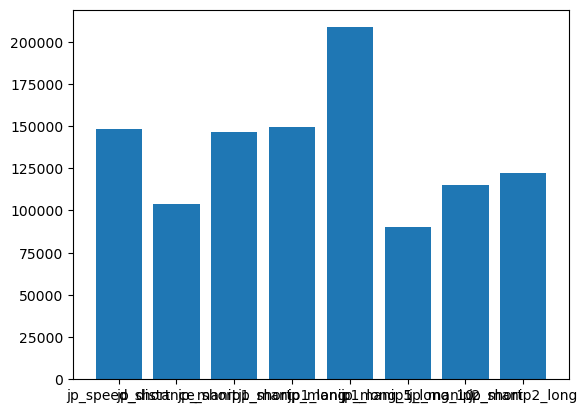

In [59]:
fig, axs = plt.subplots()
axs.bar(joint_positions_names, best_metric)